# Forecasting Timeseries Data using Facebook FbProphet

Steps required with FbProphet
1) Introduction and Installation
2) Data preprocessing with Time Series
3) Model fitting
4) Obtaining the forecast
5) Plotting the forecast 
6) Cross Validation
7) Computing performance metrics
8) Visualize the performance metrics
9) conclusions



In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install pystan


In [ ]:
!pip install fbprophet

In [ ]:
df=pd.read_csv("milk.csv")
df.head(170)

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [ ]:
df.columns=["ds","y"]
df.head()

,ds,y
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


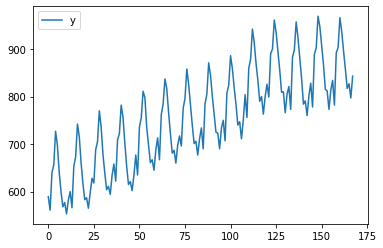

In [ ]:
df.plot()


In [ ]:
df["ds"]=pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


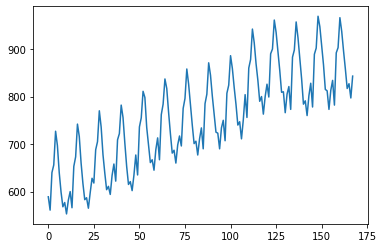

In [ ]:
df["y"].plot()

In [ ]:
from fbprophet import Prophet

In [ ]:
# Initialize the model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create future dates of 365 days (adds more 365 days to the tail of the dataset)
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [ ]:
# prediction for the futures dates (the new 365 days which were added to the tail including the previous data too) 

prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.848249,576.809185,596.420830,606.848249,606.848249,-20.073390,-20.073390,-20.073390,-20.073390,-20.073390,-20.073390,0.0,0.0,0.0,586.774860
1,1962-02-01,608.572034,536.007954,555.187420,608.572034,608.572034,-62.557652,-62.557652,-62.557652,-62.557652,-62.557652,-62.557652,0.0,0.0,0.0,546.014381
2,1962-03-01,610.129000,632.249936,651.208629,610.129000,610.129000,31.436665,31.436665,31.436665,31.436665,31.436665,31.436665,0.0,0.0,0.0,641.565665
3,1962-04-01,611.852785,648.968521,668.951583,611.852785,611.852785,46.730075,46.730075,46.730075,46.730075,46.730075,46.730075,0.0,0.0,0.0,658.582860
4,1962-05-01,613.520963,712.403478,731.842322,613.520963,613.520963,108.043261,108.043261,108.043261,108.043261,108.043261,108.043261,0.0,0.0,0.0,721.564225


Plotting the forecast

Prophet has an in built feature that enables us to plot the forecasts we just generated . This is achieved using model.plot() and passing in our forecast as an argument .The Blue line in the graph represents the predicted values while the black dots represnts the data in our dataset


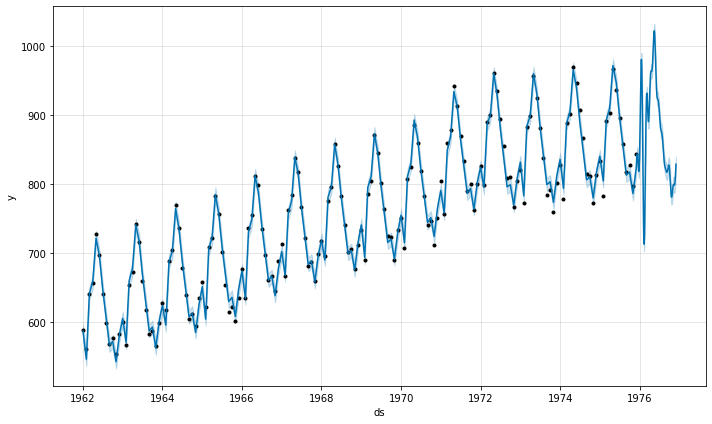

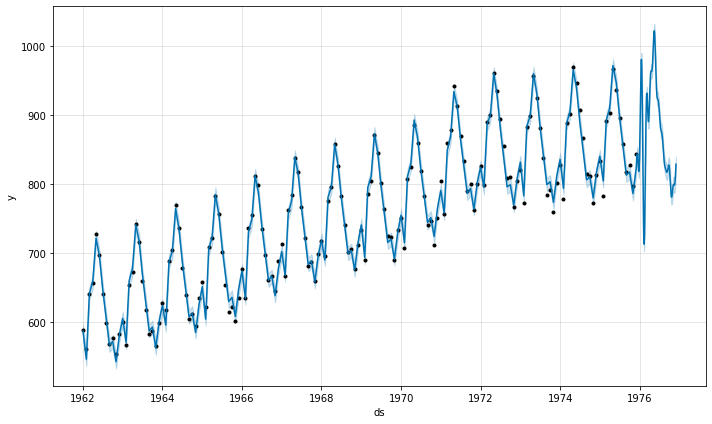

In [ ]:
# Plot the predicted projection
model.plot(prediction)

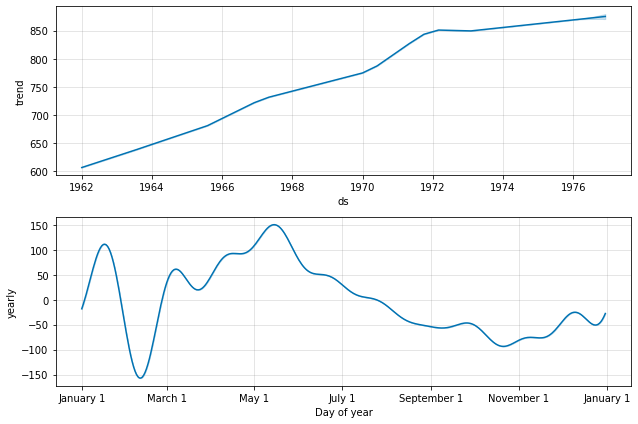

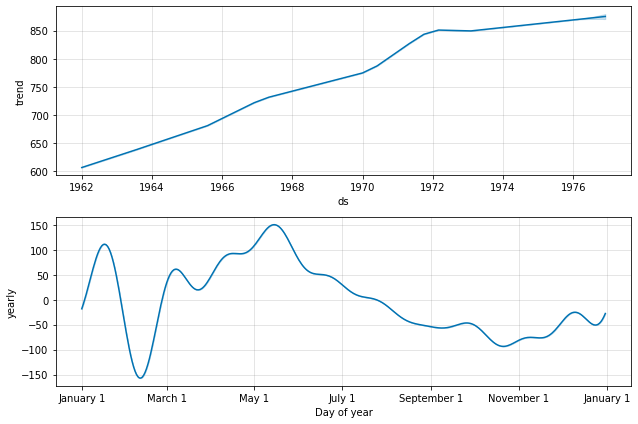

In [ ]:
## Visualize Each componenets [Trends,yearly]
model.plot_components(prediction)

Cross validation

Next lets measure the forecast error using the historical data,we will do this by comparing the predicted value with the actual value. In oerder to perform this operation we select cut off points in the history of the data and fit the model with data upto that cut off point . Afterwards we compare the actual values to the predicted values .The cross_validation method allows us to do this in Prophet.This method takes the following parameter as explained below:

1) horizon the forecast horizon
2) initial the size of the initial training period
3) period the spacing between cutoff dates


In [ ]:
from fbprophet.diagnostics import cross_validation


In [ ]:
(365*0.5)

182.5

In [ ]:
# here period is basically horizon*0.5  so 365*0.5=182.5 so we can take 180 days as period
# initial = horizon*3  so 365*3=1095 days
df_cv=cross_validation(model,horizon="365 days", period="180 days",initial="1095 days")

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,631.098104,629.243053,633.016290,622,1965-01-22
1,1965-03-01,715.100495,708.735214,721.134978,709,1965-01-22
2,1965-04-01,735.552474,722.317398,748.001247,722,1965-01-22
3,1965-05-01,806.443792,785.744729,827.101003,782,1965-01-22
4,1965-06-01,774.722057,747.181046,805.373969,756,1965-01-22


In [ ]:
# Performance metrics

from fbprophet.diagnostics import performance_metrics


In [ ]:
df_performace=performance_metrics(df_cv)
df_performace.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,43.961884,6.630376,5.492873,0.663516,0.236828,0.666667
1,42 days,41.855569,6.469588,5.321461,0.495687,0.213014,0.708333
2,43 days,41.818937,6.466756,5.307261,0.493521,0.213014,0.708333
3,46 days,47.253811,6.874141,5.711201,0.495365,0.213014,0.666667
4,47 days,55.074944,7.421249,6.142160,0.539690,0.236828,0.645833
